## Import

In [7]:
from tqdm import tqdm
import numpy as np
from geneticalgorithm import geneticalgorithm as ga
import matplotlib.pyplot as plt
from pso import PSO

## Banana Func

In [3]:
# minimum solution : (1, 1)
def f(X):
    a, b = 1, 100
    return ((a - X[0]) ** 2) + b*(X[1]-X[0]**2)**2

## Visualize Search-Space

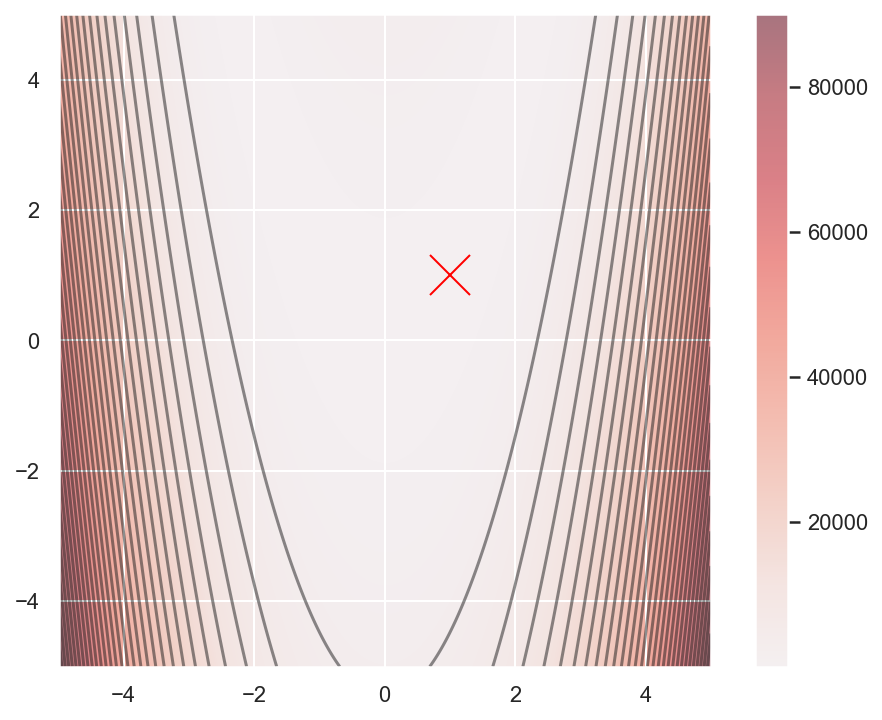

In [5]:
x_lb = y_lb = -5
x_ub = y_ub = 5
x, y = np.meshgrid(np.linspace(x_lb, x_ub, 5000), np.linspace(y_lb, y_ub, 5000))
z = f([x,y])
x_sol = x.flatten()[z.argmin()]
y_sol = y.flatten()[z.argmin()]

plt.figure(figsize=(8,6))
# left, right, bottom, top
plt.imshow(z, extent=[x_lb,x_ub,y_lb,y_ub], origin='lower', cmap=plt.cm.Reds, alpha=0.5)
plt.colorbar()
plt.plot(x_sol, y_sol, marker='x', markersize=20, color="red")
contours = plt.contour(x, y, z, 30, colors='k', alpha=0.5)
plt.show()

## Vriable Boundaries

In [6]:
varbound = np.array([[x_lb, x_ub],
                     [y_lb, y_ub]])

## GA

In [8]:
model = ga(function=f,
          dimension=2,
          variable_type='real',
          variable_boundaries=varbound,
          convergence_curve=0)

%time model.run()

 The best solution found:                                                                           
 [1.04862773 1.10001831]

 Objective function:
 0.002380512011821355
Wall time: 27.9 s


## PSO

```python
class PSO:
    def __init__(self, func, dimension, varbound, size=1000, w=0.5, c1=0.25, c2=0.25, n_iter=1000):
        self.f = func
        self.dim = dimension
        self.varbound = varbound
        self.size = size
        self.w = w
        self.c1 = c1
        self.c2 = c2
        self.n_iter = n_iter

    def generate(self):
        X = np.array([np.random.uniform(bound[0], bound[-1],
                     size=(self.size,)) for bound in self.varbound])
        V = np.random.randn(self.dim, self.size) * 0.1
        self.X = X  # dim x size
        self.V = V  # dim x size

    def initialize(self):
        pbest_loc = self.X
        pbest_value = self.f(self.X)
        gbest_loc = pbest_loc[:, pbest_value.argmin()]
        gbest_value = pbest_value.min()
        self.pbest_loc = pbest_loc
        self.pbest_value = pbest_value
        self.gbest_loc = gbest_loc
        self.gbest_value = gbest_value

    def update(self):
        r1, r2 = np.random.rand(2)
        self.V = self.w * self.V + r1 * self.c1 * \
            (self.pbest_loc - self.X) + r2 * self.c2 * \
            (self.gbest_loc[..., np.newaxis] - self.X)
        self.X = self.X + self.V
    
    def evaluate(self):
        obj_value = self.f(self.X)
        cond = obj_value <= self.pbest_value
        self.pbest_loc[:, cond] = self.X[:, cond]
        self.pbest_value = np.vstack([self.pbest_value, obj_value]).min(axis=0)
        self.gbest_loc = self.pbest_loc[:, self.pbest_value.argmin()]
        self.gbest_value = self.pbest_value.min()

    def run(self):
        self.generate()
        self.initialize()
        for _ in tqdm(range(self.n_iter)):
            self.update()
            self.evaluate()
        print("Solution:", self.gbest_loc)
```        

In [10]:
model = PSO(func=f,
            dimension=2, 
            varbound=varbound)
%time model.run()

100%|██████████| 1000/1000 [00:00<00:00, 8359.47it/s]

Solution: [1. 1.]
Wall time: 124 ms
